In [242]:


import pandas as pd 
import requests as req
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

In [243]:
shooting_data = pd.read_csv('school_shooting.csv')
shooting_data

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.60,9,12,41.0,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.00,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.00,9,12,125.0,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.00,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,334,050002600867,Pine Bluff High School,500026.0,Pine Bluff School District,4/11/2022,2021-2022,2022,2:45 PM,Monday,...,34.219096,-92.010781,58.17,9,12,892.0,Jefferson County,5,5069,13.0
334,340,NaN,Edmund Burke School,NaN,NaN,4/22/2022,2021-2022,2022,3:18 PM,Friday,...,38.943041,-77.062093,NaN,6,12,NaN,District of Columbia,11,11001,11.0
335,338,262540000932,Aspen Ridge Elementary School,2625400.0,Nice Community School District,4/26/2022,2021-2022,2022,1:30 PM,Tuesday,...,46.480500,-87.728900,50.95,KG,8,264.0,Marquette County,26,26103,41.0
336,328,170993000709,Walt Disney Magnet School,1709930.0,City Of Chicago Sd 299,5/17/2022,2021-2022,2022,10:00 AM,Tuesday,...,41.956800,-87.646900,NaN,PK,8,NaN,Cook County,17,17031,11.0


In [244]:
shooting_data.columns

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')

In [245]:
# Column Drop
shooting_data.drop(columns=['district_name','nces_district_id','state_fips', 'county_fips','ulocale','staffing','resource_officer'])

,uid,nces_school_id,school_name,date,school_year,year,time,day_of_week,city,state,...,hawaiian_native_pacific_islander,two_or_more,weapon,weapon_source,lat,long,low_grade,high_grade,lunch,county
0,1,080480000707,Columbine High School,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,...,NaN,NaN,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,9,12,41.0,Jefferson County
1,2,220054000422,Scotlandville Middle School,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,...,NaN,NaN,.22 caliber pistol,NaN,30.529958,-91.169966,6,8,495.0,East Baton Rouge Parish
2,3,130441001591,Heritage High School,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,...,NaN,NaN,".22 caliber rifle, 357-caliber Magnum handgun",NaN,33.626922,-84.047960,9,12,125.0,Rockdale County
3,4,421899003847,John Bartram High School,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,...,NaN,NaN,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,9,12,2007.0,Philadelphia County
4,5,250279000225,Dorchester High School,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,...,NaN,NaN,NaN,NaN,42.285268,-71.075901,9,12,543.0,Suffolk County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,334,050002600867,Pine Bluff High School,4/11/2022,2021-2022,2022,2:45 PM,Monday,Pine Bluff,Arkansas,...,0.0,3.0,NaN,NaN,34.219096,-92.010781,9,12,892.0,Jefferson County
334,340,NaN,Edmund Burke School,4/22/2022,2021-2022,2022,3:18 PM,Friday,Washington,District of Columbia,...,NaN,NaN,sniper rifle,NaN,38.943041,-77.062093,6,12,NaN,District of Columbia
335,338,262540000932,Aspen Ridge Elementary School,4/26/2022,2021-2022,2022,1:30 PM,Tuesday,West Ishpeming,Michigan,...,5.0,16.0,NaN,NaN,46.480500,-87.728900,KG,8,264.0,Marquette County
336,328,170993000709,Walt Disney Magnet School,5/17/2022,2021-2022,2022,10:00 AM,Tuesday,Chicago,Illinois,...,3.0,61.0,NaN,NaN,41.956800,-87.646900,PK,8,NaN,Cook County


In [246]:
cas = shooting_data.groupby('year').sum()[["casualties"]]
cas['occurence'] = shooting_data.groupby('year').count().uid


cas

,casualties,occurence
year,,
1999,49,7
2000,7,12
2001,27,13
2002,8,5
2003,13,12
2004,12,9
2005,26,13
2006,25,15
2007,18,10


<function matplotlib.pyplot.show(close=None, block=None)>

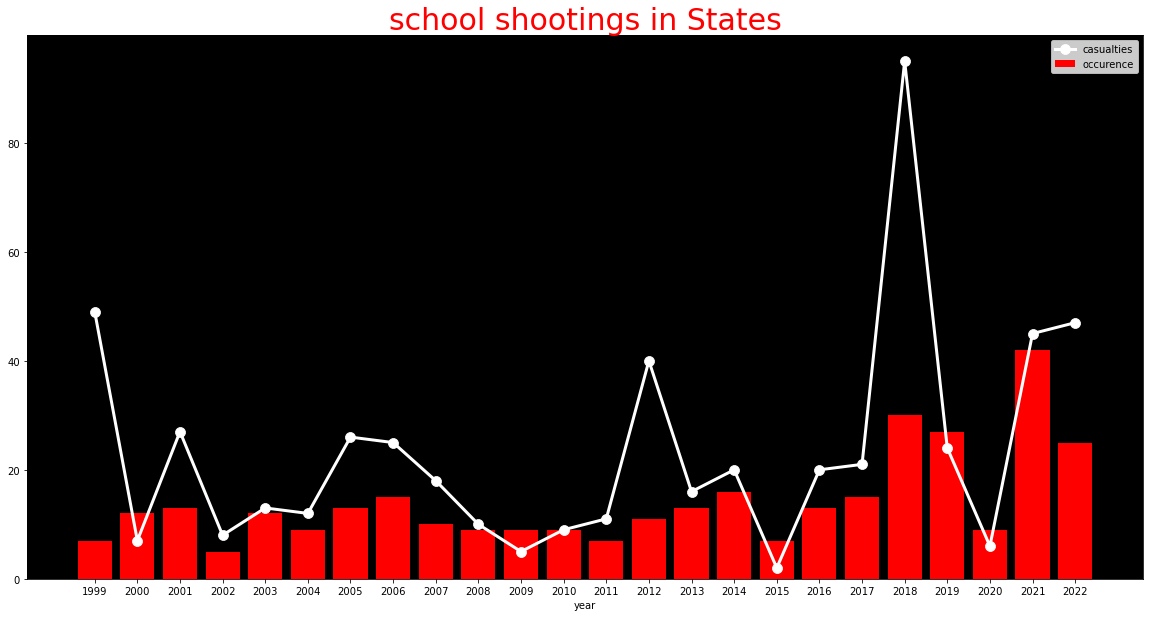

In [247]:
ax = plt.axes()
ax.set_facecolor('black')

plt.bar(cas.index, cas.occurence, color = 'red', label = 'occurence')
sns.lineplot(data = cas, x= cas.index, y = 'casualties', color = 'w', marker = 'o', ms = 10, label = 'casualties', lw = 3)
mpl.rcParams['figure.figsize'] = [1, 10] 

plt.title("school shootings in States", fontsize = 30, color = "red")
plt.ylabel("")
plt.xticks([n for n in range(1999, 2023)])
plt.legend() # Legend Size increase

plt.show


In [248]:
count = shooting_data[['state','uid']].groupby('state').count()['uid']
count.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Pennsylvania ', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington',
       'Wisconsin'],
      dtype='object', name='state')

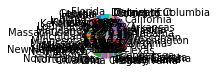

In [249]:
plt.pie(count, labels = count.index, autopct = "%.1f%%")
mpl.rcParams['figure.figsize'] = [20, 10] 
plt.show()






In [250]:
shooting_data.groupby("state").count().index
shooting_data.groupby("state").count()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
state,,,,,,,,,,,,,,,,,,,,,
Alabama,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Alaska,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Arizona,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,2,3,3,3,3
Arkansas,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
California,36,35,36,36,35,36,36,36,35,36,...,36,36,31,36,36,35,36,36,36,36
Colorado,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Connecticut,5,4,5,3,3,5,5,5,5,5,...,5,5,4,5,5,3,5,5,5,5
Delaware,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
District of Columbia,5,4,5,4,4,5,5,5,4,5,...,5,5,3,5,5,2,5,5,5,5


<AxesSubplot:xlabel='Count', ylabel='age_shooter1'>

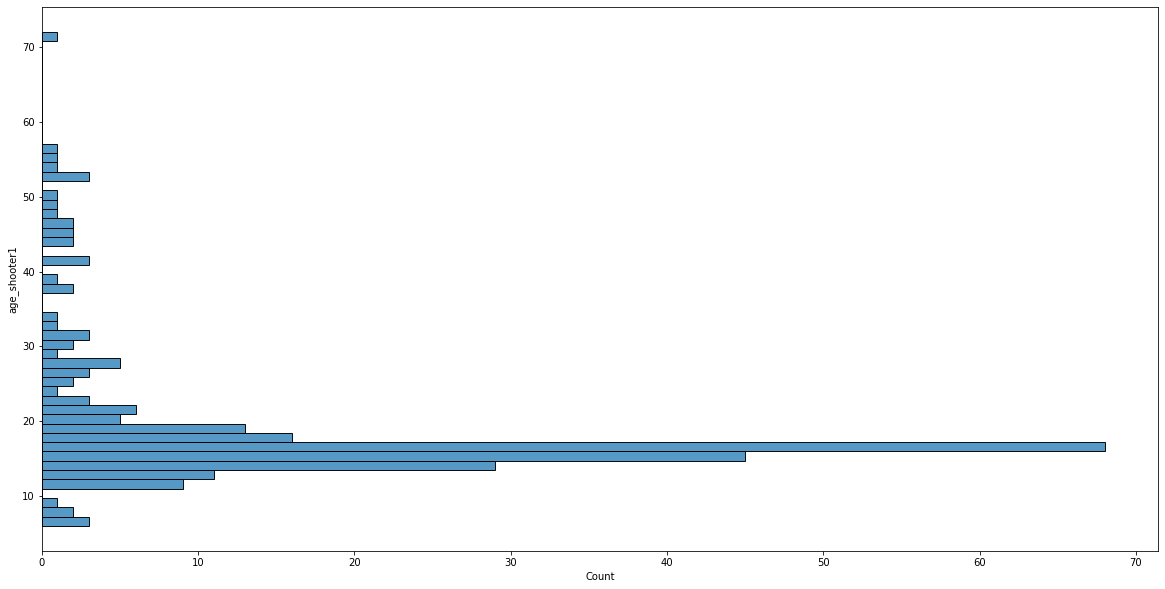

In [251]:
sns.histplot(data = shooting_data, y = "age_shooter1")

In [252]:
shooting_data.age_shooter1

bins = [-1, 19, 39, 59, 100]
labels = ["0 ~ 19세", "20 ~ 39세", "40 ~ 59세", "60세 이상"]

In [253]:
age = shooting_data["age_shooter1"]
ages = pd.cut(age, bins, labels = labels)
shooting_data["ranges"] = ages
shooting_data["ranges"]

0       0 ~ 19세
1       0 ~ 19세
2       0 ~ 19세
3       0 ~ 19세
4           NaN
         ...   
333         NaN
334    20 ~ 39세
335         NaN
336     0 ~ 19세
337     0 ~ 19세
Name: ranges, Length: 338, dtype: category
Categories (4, object): ['0 ~ 19세' < '20 ~ 39세' < '40 ~ 59세' < '60세 이상']

In [254]:
age_rng = shooting_data.groupby("ranges")["uid"].count()
age_rng

ranges
0 ~ 19세     197
20 ~ 39세     36
40 ~ 59세     18
60세 이상        1
Name: uid, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

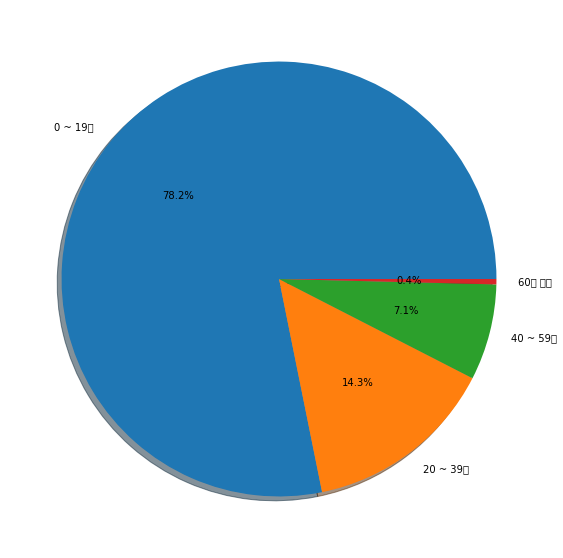

In [255]:
plt.pie(age_rng, labels = age_rng.index, autopct = "%.1f%%", shadow = True)
plt.show

In [256]:
handgun_list = ["handgun", "revolver", "Magnum", "pistol", "officer", "service",
                "semi-automatic", "Glock", "P238", "9mm gun", "40 caliber gun"]
rifle_list = ["rifle", "AK-47", "AR", "M&P15"]
shotgun_list = ["shotgun"]

shooting_data.weapon = shooting_data.weapon.fillna("Unknown")
shooting_data.loc[shooting_data.weapon.str.contains("|".join(handgun_list)), "weapon"] = "handgun"
shooting_data.loc[shooting_data.weapon.str.contains("|".join(rifle_list)), "weapon"] = "rifle"
shooting_data.loc[shooting_data.weapon.str.contains("|".join(shotgun_list)), "weapon"] = "shotgun"

In [257]:
# shooting_data.weapon = shooting_data.weapon.fillna("Unknown")
# shooting_data.loc[shooting_data.weapon.str.contains("Smith & Wesson M&P15"), "weapon"] = "Rifle"

In [258]:
shooting_data.weapon.unique()

array(['handgun', 'Unknown', 'shotgun', 'rifle'], dtype=object)

In [259]:
weapons = shooting_data[["weapon","uid"]].groupby("weapon").count()
weapons.uid

weapon
Unknown    100
handgun    203
rifle       22
shotgun     13
Name: uid, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

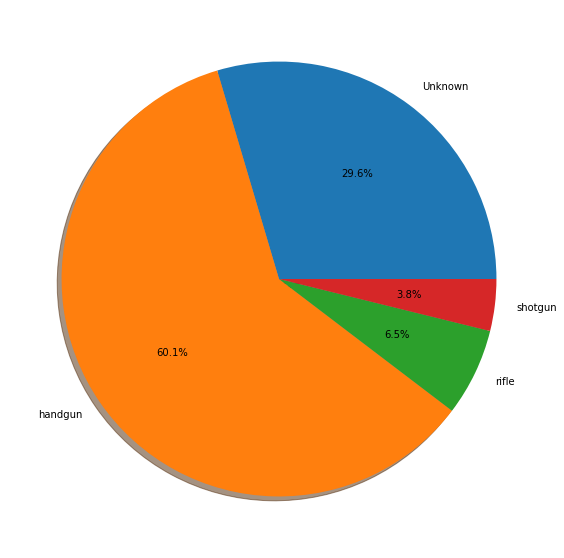

In [260]:
plt.pie(weapons.uid, labels = weapons.index, autopct = "%.1f%%", shadow = True)
plt.show

In [261]:
# Correlation
corr = shooting_data.corr()
corr

,uid,nces_district_id,year,enrollment,killed,injured,casualties,age_shooter1,shooter_deceased1,age_shooter2,...,hawaiian_native_pacific_islander,two_or_more,resource_officer,lat,long,staffing,lunch,state_fips,county_fips,ulocale
uid,1.000000,0.010202,0.972410,-0.023702,-0.011543,-0.080679,-0.056538,0.048731,5.624437e-02,-1.078314e-01,...,-0.077059,0.117469,-0.211066,0.016537,0.064529,0.025168,0.112162,-0.009840,-0.009702,0.011917
nces_district_id,0.010202,1.000000,-0.005058,-0.110154,-0.019156,-0.081261,-0.059326,-0.151578,3.814011e-02,4.254120e-01,...,-0.017411,0.028521,0.003353,0.208980,0.214473,-0.046217,-0.112925,0.999976,0.999955,0.095398
year,0.972410,-0.005058,1.000000,-0.050075,-0.010290,-0.070963,-0.049415,0.070661,5.775821e-02,-1.790345e-01,...,-0.072057,0.112236,-0.168911,-0.002040,0.048678,-0.005240,0.076341,-0.025465,-0.025321,0.040694
enrollment,-0.023702,-0.110154,-0.050075,1.000000,0.045472,0.122719,0.095507,-0.212540,-5.152910e-02,2.682317e-02,...,0.126434,0.628337,0.229224,-0.139016,-0.210804,0.892774,0.773905,-0.101840,-0.101527,-0.115497
killed,-0.011543,-0.019156,-0.010290,0.045472,1.000000,0.433059,0.851265,0.007028,2.475066e-01,4.299430e-02,...,-0.027908,0.039825,0.060640,-0.023975,0.003696,0.023706,-0.084612,-0.013502,-0.013304,0.084767
injured,-0.080679,-0.081261,-0.070963,0.122719,0.433059,1.000000,0.840935,-0.076897,4.573028e-02,1.267282e-01,...,0.003839,0.052923,0.199931,-0.022219,-0.112634,0.048692,-0.114102,-0.075932,-0.075826,0.057612
casualties,-0.056538,-0.059326,-0.049415,0.095507,0.851265,0.840935,1.000000,-0.039979,1.631576e-01,9.654969e-02,...,-0.016821,0.049539,0.153744,-0.027063,-0.061088,0.040751,-0.123481,-0.052846,-0.052657,0.085825
age_shooter1,0.048731,-0.151578,0.070661,-0.212540,0.007028,-0.076897,-0.039979,1.000000,1.856955e-01,-2.134300e-01,...,-0.142580,-0.104851,-0.112091,-0.000145,0.010776,-0.180488,-0.118909,-0.143157,-0.142722,0.059525
shooter_deceased1,0.056244,0.038140,0.057758,-0.051529,0.247507,0.045730,0.163158,0.185695,1.000000e+00,-7.066224e-17,...,-0.037421,0.169670,-0.038264,0.144275,-0.127274,-0.060512,-0.104687,0.044124,0.043627,0.140277
age_shooter2,-0.107831,0.425412,-0.179034,0.026823,0.042994,0.126728,0.096550,-0.213430,-7.066224e-17,1.000000e+00,...,0.366900,0.272967,0.204656,0.070883,0.061071,-0.231863,-0.325137,0.413264,0.412830,0.004242


<AxesSubplot:>

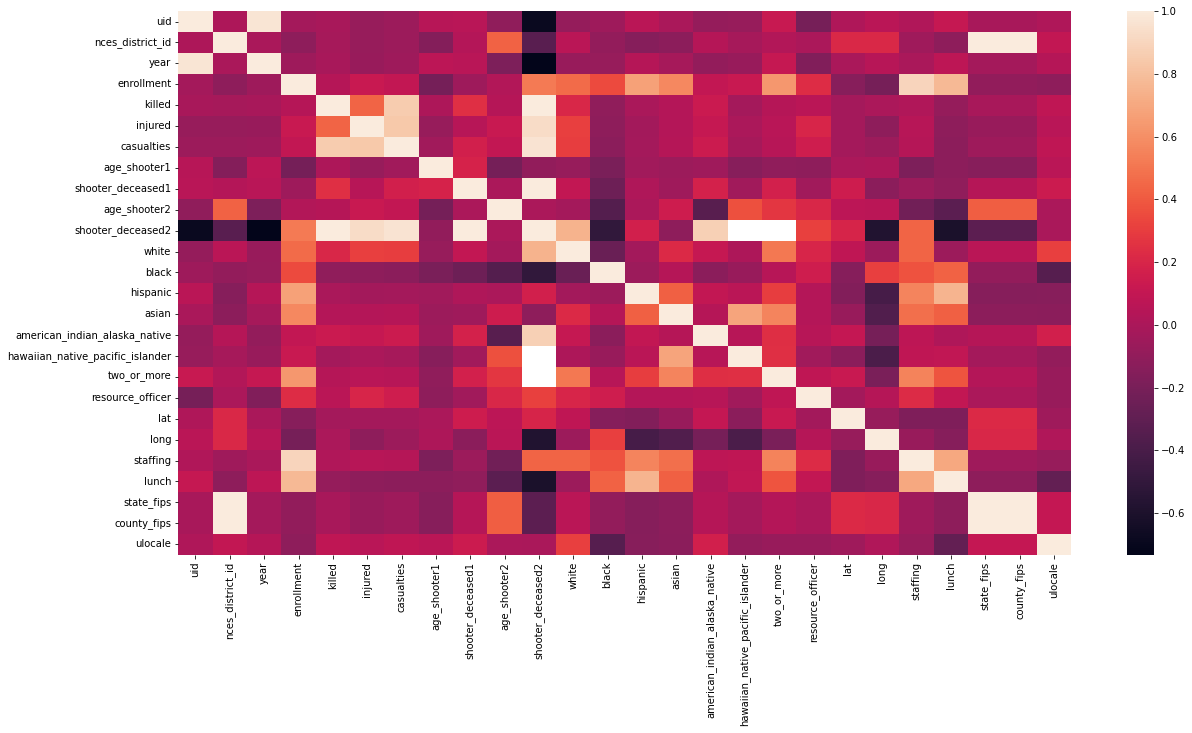

In [262]:
# Correlation - heatmap
sns.heatmap(corr)

In [263]:
import plotly.graph_objects as go
import plotly.express as px

In [266]:
shooting_data['text'] = shooting_data['school_name'] + '' + shooting_data['city'] + ', ' + shooting_data['state'] + '' + 'Casualties: ' + shooting_data['casualties'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = shooting_data['long'],
        lat = shooting_data['lat'],
        text = shooting_data['text'],
        mode = 'markers',
        marker_color = shooting_data['casualties'],
        ))

fig.update_layout(
        title = 'School Shooting, 1999-2022 <br>(Hover for school names)',
        geo_scope='usa',
    )
fig.show()